C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_5520\4085344887.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




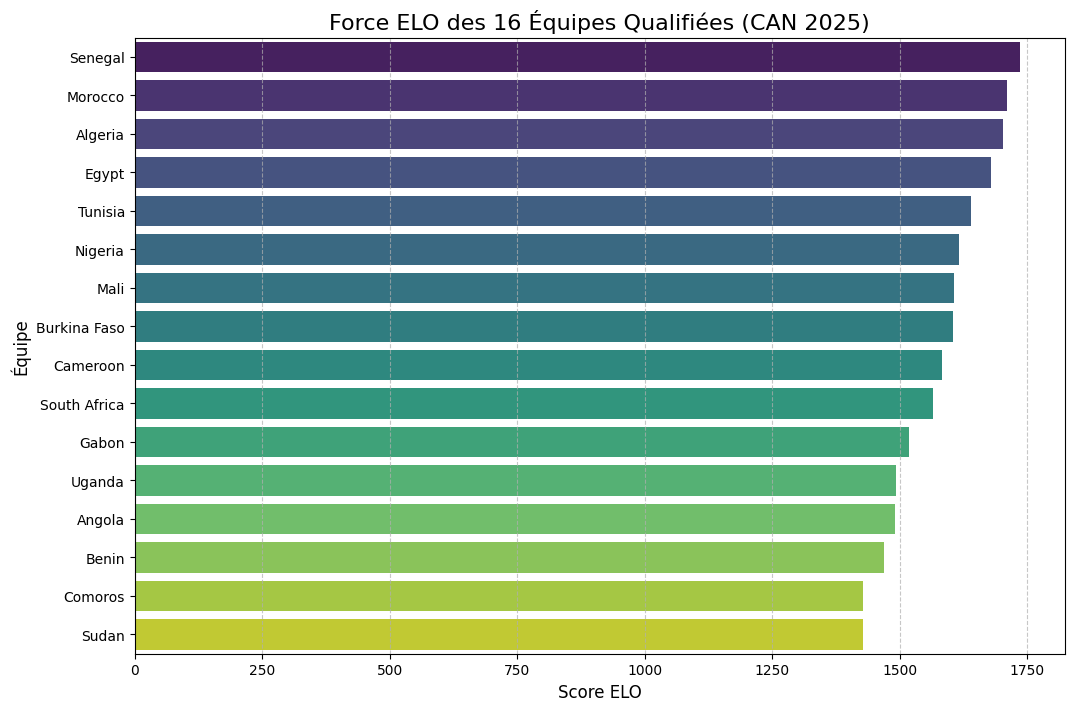

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger les résultats du script de simulation (nous allons re-calculer le chemin ici)
# Pour une vraie application, vous enregistreriez les résultats dans un CSV.
# Pour l'exemple, nous allons charger les données ELO de base.
df_elo = pd.read_csv('../data/processed/can_processed_data_with_elo.csv')
# Obtenez les scores ELO actuels (vous devrez copier la fonction get_final_elo_scores ici)
def get_final_elo_scores(df):
    last_home_match = df.groupby('home_team').last().reset_index()[['home_team', 'home_elo']]
    last_away_match = df.groupby('away_team').last().reset_index()[['away_team', 'away_elo']]
    last_home_match.columns = ['team', 'elo']
    last_away_match.columns = ['team', 'elo']
    final_elos = pd.concat([last_home_match, last_away_match])
    return final_elos.groupby('team')['elo'].max().to_dict()

current_elo_ratings = get_final_elo_scores(df_elo)

# 2. Convertir les ratings en DataFrame
df_ratings = pd.DataFrame(current_elo_ratings.items(), columns=['Team', 'ELO Rating'])

# Filtrer pour n'afficher que les 16 équipes qualifiées (basées sur la dernière simulation)
qualified_teams_simulated = ['Morocco', 'Comoros', 'Egypt', 'South Africa', 'Nigeria', 'Uganda', 'Senegal', 'Benin', 'Algeria', 'Burkina Faso', 'Cameroon', 'Gabon', 'Tunisia', 'Sudan', 'Mali', 'Angola']
df_ko_teams = df_ratings[df_ratings['Team'].isin(qualified_teams_simulated)].sort_values(by='ELO Rating', ascending=False)

# 3. Création du graphique à barres pour la force des équipes KO
plt.figure(figsize=(12, 8))
sns.barplot(
    x='ELO Rating', 
    y='Team', 
    data=df_ko_teams, 
    palette=sns.color_palette("viridis", len(df_ko_teams))
)
plt.title('Force ELO des 16 Équipes Qualifiées (CAN 2025)', fontsize=16)
plt.xlabel('Score ELO', fontsize=12)
plt.ylabel('Équipe', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()